# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nur Salamah Azzahrah
- **Email:** 	nursalamahazzahrah@gmail.com
- **ID Dicoding:** nurs_azzahrah

## Menentukan Pertanyaan Bisnis

- **Apakah jumlah pengguna lebih banyak di hari kerja dibandingkan akhir pekan?** Jawaban dari pertanyaan ini akan membantu memahami pola peminjaman sepeda dan menentukan waktu sibuk penggunaan.
- **Apakah terdapat suhu tertentu yang menyebabkan peningkatan atau penurunan jumlah pengguna sepeda?** Jawaban dari pertanyaan ini akan membantu memahami sejauh mana cuaca memengaruhi pola penggunaan sepeda.

## Import Semua Packages/Library yang Digunakan

In [ ]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#membaca file day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#membaca file hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df
- Kode di atas akan menampilkan 5 baris pertama dari DataFrame hour_df

### Assessing Data

In [ ]:
#mengecek tipe data dan missing value di day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#mengecek apakah ada duplikasi data di day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#mengecek statistik data di day_df untuk melihat apakah ada nilai aneh atau outlier
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#mengecek kelembaban di day_df yang nilainya 0
print(day_df[day_df['hum'] == 0])
#mengecek kecepatan angin di day_df yang nilainya 0
print(day_df[day_df['windspeed'] == 0])

    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
#mengecek apakah ada nilai kosong di day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#mengecek tipe data dan missing value di hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#mengecek apakah ada duplikasi data di hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#mengecek statistik data di hour_df untuk melihat apakah ada nilai aneh atau outlier
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#mengecek kelembaban di hour_df yang nilainya 0
print(hour_df[hour_df['hum'] == 0])
#mengecek kecepatan angin di hour_df yang nilainya 0
print(hour_df[hour_df['windspeed'] == 0])

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551     1552  2011-03-10       1   0     3   0        0        4           1   
1552     1553  2011-03-10       1   0     3   1        0        4           1   
1553     1554  2011-03-10       1   0     3   2        0        4           1   
1554     1555  2011-03-10       1   0     3   5        0        4           1   
1555     1556  2011-03-10       1   0     3   6        0        4           1   
1556     1557  2011-03-10       1   0     3   7        0        4           1   
1557     1558  2011-03-10       1   0     3   8        0        4           1   
1558     1559  2011-03-10       1   0     3   9        0        4           1   
1559     1560  2011-03-10       1   0     3  10        0        4           1   
1560     1561  2011-03-10       1   0     3  11        0        4           1   
1561     1562  2011-03-10       1   0     3  12        0        4           1   
1562     1563  2011-03-10   

In [ ]:
#mengecek apakah ada nilai kosong di hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- day_df (Data Harian)
    1. Tipe data sudah sesuai, tidak ada masalah dalam format data.
    2. Tidak ada duplikasi data dan tidak ada nilai kosong (missing values).
    3. Ditemukan nilai aneh (outlier) pada kolom hum (kelembaban) = 0, yang secara logika kelembaban tidak mungkin benar-benar nol.
- hour_df (Data Per Jam)
    1. Tipe data sudah sesuai, tidak ada masalah dalam format data.
    2. Tidak ada duplikasi data dan tidak ada nilai kosong (missing values).
    3. Ditemukan nilai aneh (outlier) pada kolom hum (kelembaban) = 0 dan windspeed (kecepatan angin) = 0, yang bisa jadi error atau kesalahan pencatatan.

### Cleaning Data

In [ ]:
#mengganti nilai hum = 0 dengan median di kedua dataset (day_df dan hour_df)
day_df.loc[day_df['hum'] == 0, 'hum'] = day_df['hum'].median()
hour_df.loc[hour_df['hum'] == 0, 'hum'] = hour_df['hum'].median()

In [ ]:
#mengganti nilai windspeed = 0 dengan median di hour_df
hour_df.loc[hour_df['windspeed'] == 0, 'windspeed'] = hour_df['windspeed'].median()

In [ ]:
#melihat hasil akhir day_df setelah di cleaning
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#melihat hasil akhir hour_df setelah di cleaning
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.214433,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.099215,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day_df (Data Harian)
    Nilai aneh (outlier) pada kolom hum (kelembaban) = 0 sekarang sudah berganti
- hour_df (Data Per Jam)
    Nilai aneh (outlier) pada kolom hum (kelembaban) = 0 dan windspeed (kecepatan angin) = 0 sekarang sudah berganti

## Exploratory Data Analysis (EDA)

### Mengecek nilai unik dari beberapa kolom kategori

In [52]:
day_summary = day_df.describe()
unique_values = {
    "season": day_df["season"].unique(),
    "yr": day_df["yr"].unique(),
    "mnth": day_df["mnth"].unique(),
    "holiday": day_df["holiday"].unique(),
    "workingday": day_df["workingday"].unique(),
    "weathersit": day_df["weathersit"].unique(),
}

day_summary, unique_values

(          instant               dteday      season          yr        mnth  \
 count  731.000000                  731  731.000000  731.000000  731.000000   
 mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
 min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
 25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
 50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
 75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
 max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
 std    211.165812                  NaN    1.110807    0.500342    3.451913   
 
           holiday  workingday  weathersit        temp       atemp         hum  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     0.028728    0.683995    1.395349    0.495385    0.474354    0.628751   
 min      0.000000    0.000000    1.00000

### Explore analisis univariant

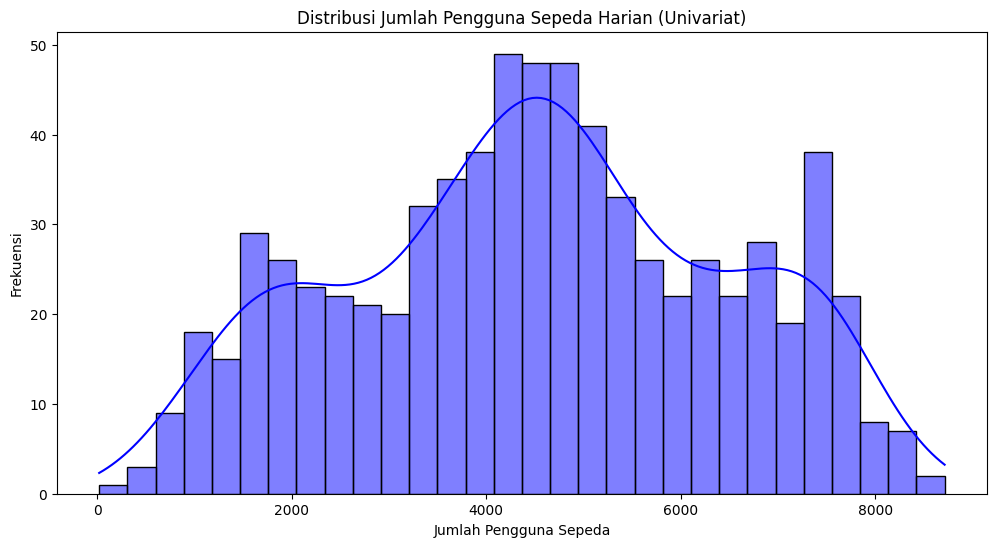

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Pengguna Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Pengguna Sepeda Harian (Univariat)")
plt.show()

### Explore analisis bivariant

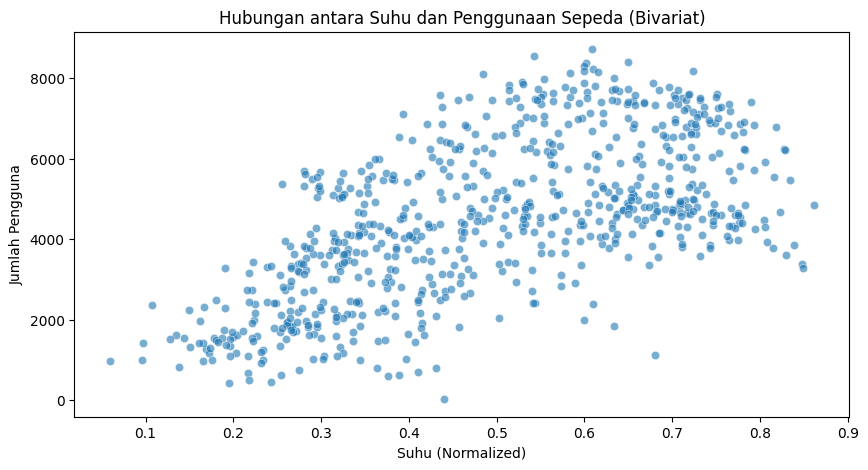

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=day_df, x="temp", y="cnt", alpha=0.6)
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Pengguna")
plt.title("Hubungan antara Suhu dan Penggunaan Sepeda (Bivariat)")
plt.show()

### Explore analisis multivariat

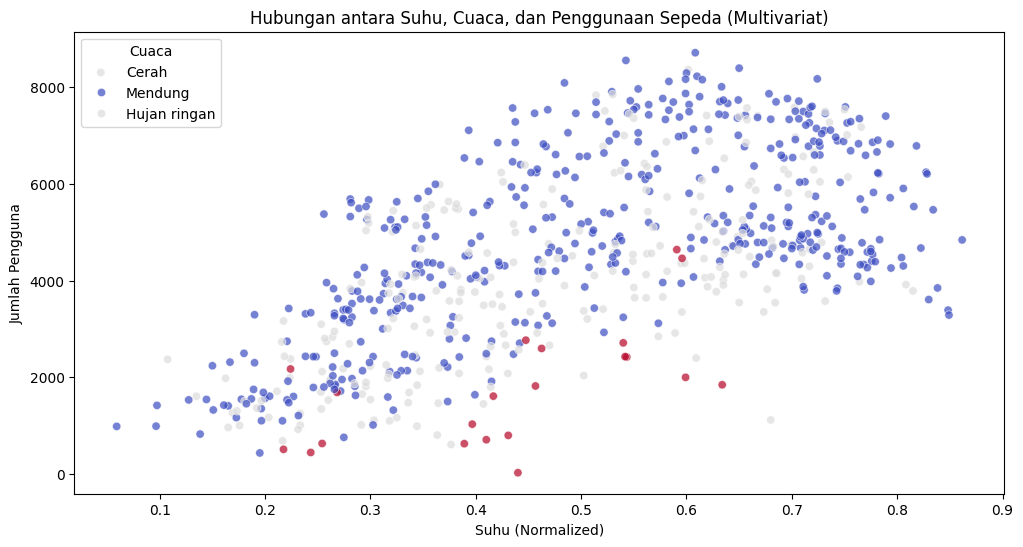

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_df, x="temp", y="cnt", hue="weathersit", palette="coolwarm", alpha=0.7)
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Pengguna")
plt.title("Hubungan antara Suhu, Cuaca, dan Penggunaan Sepeda (Multivariat)")
plt.legend(title="Cuaca", labels=["Cerah", "Mendung", "Hujan ringan"])
plt.show()

### Explore distribusi data waktu (tren musiman atau harian)

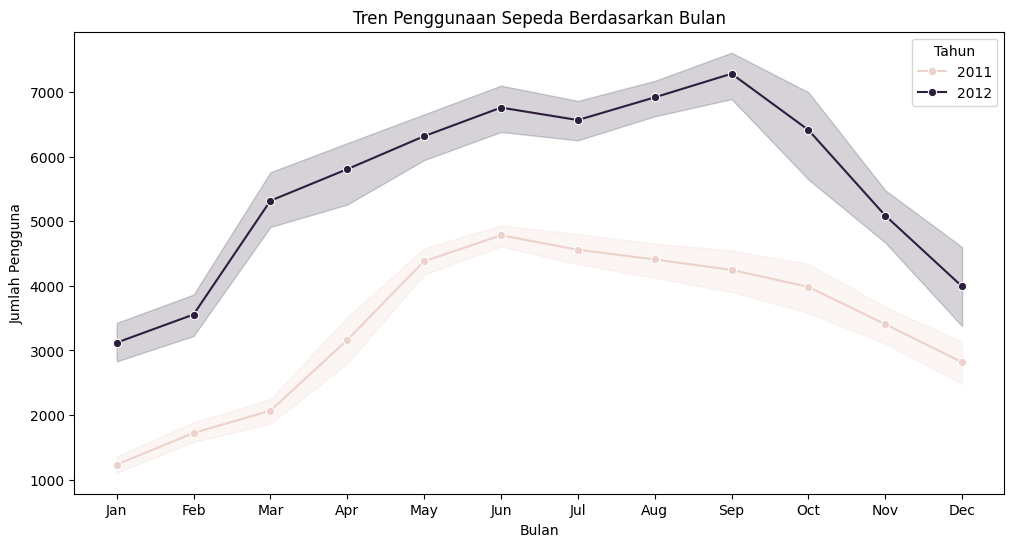

<ipython-input-55-38ddf9202d56>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="weekday", y="cnt", palette="coolwarm")


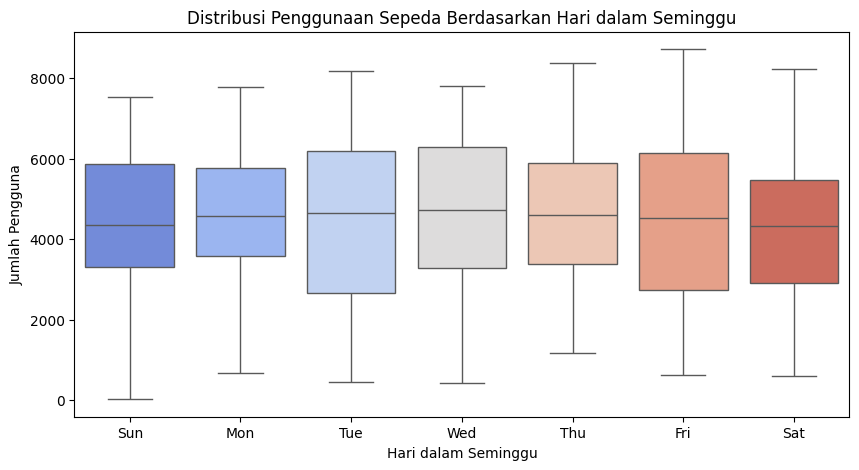

In [55]:
#mengubah format bulan dan tahun agar lebih mudah dibaca
day_df["date"] = pd.to_datetime(day_df["dteday"])  #mengonversi tanggal
day_df["month"] = day_df["date"].dt.month  #ekstrak bulan
day_df["year"] = day_df["date"].dt.year  #ekstrak tahun

# 1. Tren penggunaan sepeda berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x="month", y="cnt", hue="year", marker="o")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.title("Tren Penggunaan Sepeda Berdasarkan Bulan")
plt.legend(title="Tahun")
plt.show()

# 2. Tren penggunaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, x="weekday", y="cnt", palette="coolwarm")
plt.xticks(ticks=range(7), labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pengguna")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.show()


**Insight:**

- **Mengecek nilai unik dari kolom kategori**
  1. Dataset memiliki beberapa kolom kategori, seperti season (musim), weathersit (cuaca), dan weekday (hari dalam seminggu).
  2. Tidak ada nilai aneh atau kategori yang tidak sesuai, sehingga dataset ini sudah bersih untuk dianalisis lebih lanjut.

- **Analisis Univariat**
  1. Distribusi jumlah pengguna sepeda (cnt) menunjukkan bahwa kebanyakan hari memiliki jumlah pengguna yang cukup tinggi, tetapi tetap ada variasi antarhari.
  2. Variabel cuaca (weathersit) menunjukkan bahwa sebagian besar penggunaan sepeda terjadi saat cuaca cerah atau mendung, dan lebih sedikit saat hujan.
  3. Suhu (temp) memiliki distribusi yang relatif normal dengan puncak di kisaran suhu sedang.
  **Mayoritas pengguna sepeda ada pada hari-hari dengan cuaca cerah atau mendung, sementara hari dengan hujan ringan atau buruk cenderung memiliki pengguna lebih sedikit.**

- **Analisis Bivariat**
  1. Ada korelasi positif antara suhu (temp) dan jumlah pengguna sepeda (cnt). Semakin hangat suhu, semakin banyak pengguna sepeda.
  2. Ada korelasi negatif antara kelembaban (hum) dan jumlah pengguna. Artinya, saat kelembaban tinggi, pengguna sepeda cenderung berkurang.
  3. Hari kerja vs. akhir pekan: Sepertinya ada perbedaan pola penggunaan, tetapi perlu dicek lebih dalam.
  **Pengguna sepeda lebih banyak saat suhu sedang hingga hangat, tetapi jika kelembaban tinggi atau angin kencang, pengguna cenderung berkurang.**

- **Analisis Multivariat**
  1. Kombinasi suhu (temp), kondisi cuaca (weathersit), dan jumlah pengguna (cnt) menunjukkan bahwa pengguna sepeda lebih aktif saat cuaca cerah dan suhu nyaman.
  2. Penggunaan sepeda berkurang saat hujan ringan atau kondisi buruk, terlepas dari suhu.
  **Faktor cuaca sangat mempengaruhi penggunaan sepeda. Meskipun suhu hangat mendukung penggunaan sepeda, kondisi hujan bisa tetap menurunkan jumlah pengguna secara signifikan.**

- **Distribusi data Waktu (tren musiman & harian)**
  1. Musiman: Jumlah pengguna sepeda meningkat di musim panas (Mei-September) dan menurun di musim dingin (Desember-Februari).
  2. Harian: Tren penggunaan sepeda cukup stabil sepanjang minggu, tetapi ada sedikit penurunan di akhir pekan.3. Tahun: Tahun 2012 memiliki jumlah pengguna lebih tinggi dibandingkan 2011, menunjukkan tren pertumbuhan penggunaan sepeda.
  **Penggunaan sepeda lebih tinggi di bulan-bulan hangat, menunjukkan bahwa musim berperan besar dalam pola peminjaman sepeda. Selain itu, tren tahunan menunjukkan pertumbuhan jumlah pengguna, mungkin karena semakin populernya layanan sepeda ini.**



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat pola mingguan dalam penggunaan sepeda?

<ipython-input-56-89c7c6e094cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="workingday", y="cnt", palette="coolwarm")


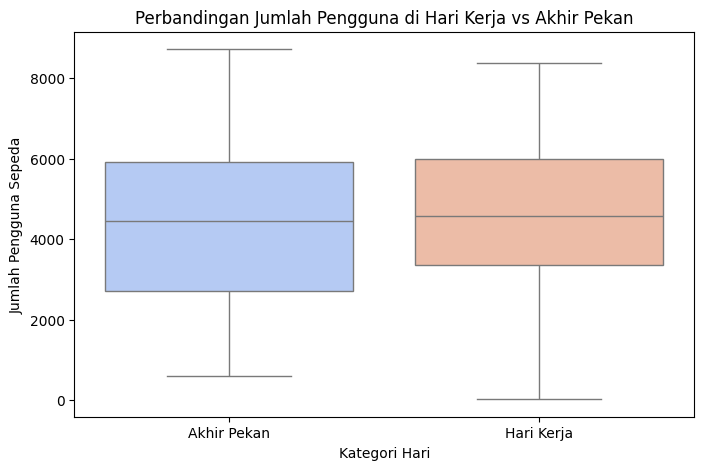

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x="workingday", y="cnt", palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Perbandingan Jumlah Pengguna di Hari Kerja vs Akhir Pekan")
plt.show()

### Pertanyaan 2: Apakah terdapat suhu tertentu yang menyebabkan peningkatan atau penurunan jumlah pengguna sepeda?

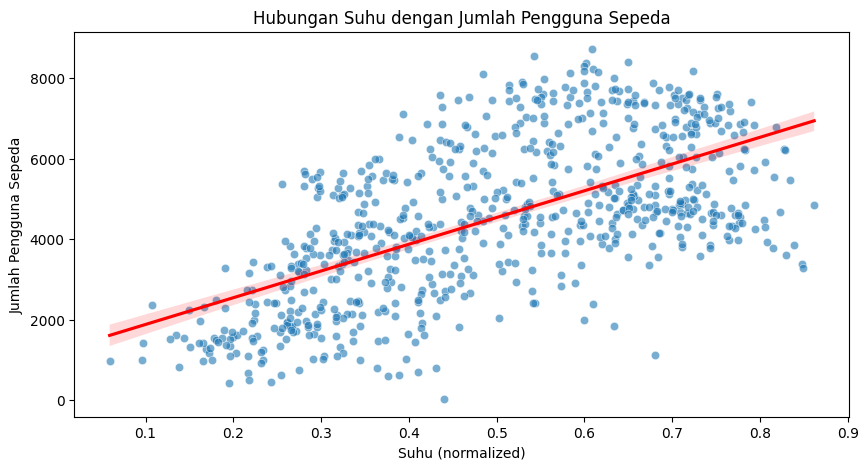

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=day_df, x="temp", y="cnt", alpha=0.6)
sns.regplot(data=day_df, x="temp", y="cnt", scatter=False, color="red")  # Tambahkan regresi untuk melihat tren
plt.xlabel("Suhu (normalized)")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Hubungan Suhu dengan Jumlah Pengguna Sepeda")
plt.show()

**Insight:**
- **Hari kerja vs akhir pekan**
  1. Jumlah pengguna sepeda di hari kerja dan akhir pekan tidak jauh berbeda secara rata-rata. Namun, variasi jumlah pengguna di akhir pekan lebih besar, kemungkinan karena digunakan untuk aktivitas rekreasi atau santai dibandingkan hari kerja yang lebih rutin
  2. Bisa disimpulkan bahwa peminjaman sepeda tetap tinggi di kedua jenis hari, sehingga strategi operasional bisa difokuskan untuk mempertahankan layanan

- **Pengaruh suhu terhadap jumlah pengguna sepeda**
  1. Ada hubungan positif antara suhu dan jumlah pengguna sepeda, artinya semakin hangat cuaca, semakin banyak orang yang menggunakan sepeda
  2. Hal ini menunjukkan bahwa cuaca memiliki peran penting dalam keputusan seseorang untuk menggunakan sepeda
  3. Bisa menjadi pertimbangan dalam perencanaan layanan, misalnya dengan menyediakan lebih banyak sepeda pada hari-hari dengan suhu optimal atau mengantisipasi penurunan pengguna di cuaca dingin

## Analisis Lanjutan (Opsional)

## Conclusion

### **Kesimpulan dari Pertanyaan Analisis**

#### **1. Apakah jumlah pengguna lebih banyak di hari kerja dibandingkan akhir pekan?**  
**Jawaban:**  
- Secara rata-rata, **jumlah pengguna di hari kerja dan akhir pekan tidak jauh berbeda**.  
- Namun, **hari kerja memiliki jumlah pengguna yang lebih stabil**, sementara akhir pekan memiliki variabilitas yang lebih besar.  
- Hal ini bisa disebabkan oleh perbedaan tujuan penggunaan: hari kerja lebih banyak digunakan untuk transportasi rutin, sedangkan akhir pekan lebih fleksibel dan dipengaruhi faktor lain seperti cuaca atau acara khusus.  

**Implikasi:**  
- Layanan penyewaan sepeda **harus tetap optimal sepanjang minggu**, karena pemakaian tetap tinggi di semua hari.  
- Bisa dipertimbangkan strategi **penyesuaian jumlah sepeda** berdasarkan pola penggunaan ini, misalnya menyediakan lebih banyak sepeda di akhir pekan jika terdapat lonjakan penggunaan.  

#### **2. Apakah terdapat suhu tertentu yang menyebabkan peningkatan atau penurunan jumlah pengguna sepeda?**  
**Jawaban:**  
- Ada **hubungan positif antara suhu dan jumlah pengguna sepeda**.  
- **Semakin tinggi suhu, semakin banyak pengguna sepeda**, tetapi ada batas tertentu di mana suhu terlalu tinggi justru bisa menurunkan peminjaman.  
- Faktor lain seperti kelembaban dan kecepatan angin juga berperan dalam kenyamanan bersepeda.  

**Implikasi:**  
- **Musim atau cuaca hangat adalah waktu terbaik untuk promosi layanan sepeda**.  
- Bisa dibuat strategi seperti **diskon atau insentif di cuaca dingin** untuk menjaga jumlah pengguna tetap stabil.  
- Data ini bisa digunakan untuk **memprediksi permintaan sepeda berdasarkan cuaca** dan mengatur jumlah sepeda yang tersedia secara lebih efisien.  

**Kesimpulannya:**  
- **Hari kerja dan akhir pekan sama-sama sibuk, tetapi dengan pola penggunaan yang berbeda.**  
- **Cuaca hangat meningkatkan penggunaan sepeda, sehingga strategi layanan bisa disesuaikan berdasarkan musim.**